In [ ]:
二十一章 可迭代对象、迭代器和生成器 
21.1.1 创建和使用迭代器

In [1]:
# 创建一个从 2 的幂次组成的列表，从 2^1 到 2^12
powers_two = [2**n for n in range(12)]
print(powers_two)

# 创建一个可以逐步遍历 powers_two 列表的迭代器
my_iter = iter(powers_two)

# 使用 next() 来逐步推进迭代器，一次获取一个元素
print(next(my_iter))
print(next(my_iter))


[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
1
2


在接下来的循环中，我们尝试从上次停下的位置继续获取 powers_two 列表中的值：

In [2]:
for i in range(10):
    print(f'第 {i} 次迭代，迭代器返回 {next(my_iter)}')


第 0 次迭代，迭代器返回 4
第 1 次迭代，迭代器返回 8
第 2 次迭代，迭代器返回 16
第 3 次迭代，迭代器返回 32
第 4 次迭代，迭代器返回 64
第 5 次迭代，迭代器返回 128
第 6 次迭代，迭代器返回 256
第 7 次迭代，迭代器返回 512
第 8 次迭代，迭代器返回 1024
第 9 次迭代，迭代器返回 2048


21.1.2 内建迭代器
Python 有一个模块 itertools，它提供了一些有用的函数来创建比简单的序列步进更高级的迭代器：

使用itertools.permutations函数生成t[0]（一个含4个字母的字符串）的所有排列。
使用next()函数获取排列迭代器中的前5个排列，分别打印排列的元组形式和连接成字符串后的形式。

In [3]:
import itertools

# 无限循环遍历一个序列
t = ['some', 'pretty', 'words']
cycle_iterator = itertools.cycle(t)

for i in range(12):
    print(next(cycle_iterator))


some
pretty
words
some
pretty
words
some
pretty
words
some
pretty
words


直接遍历排列迭代器，生成字符串'abc'的所有可能排列。
通过''.join(p)将每个排列的元组拼接成字符串并打印。

In [4]:
# 显示4个字母的前5个可能排列
permut_iterator = itertools.permutations(t[0])

for i in range(5):
    permut = next(permut_iterator)  # 获取排列的下一个值
    print(permut)  # 打印当前排列

    # 将每个字母组合成一个字符串（可以查阅str.join()的文档）
    print(''.join(permut))

('s', 'o', 'm', 'e')
some
('s', 'o', 'e', 'm')
soem
('s', 'm', 'o', 'e')
smoe
('s', 'm', 'e', 'o')
smeo
('s', 'e', 'o', 'm')
seom


In [5]:
# 显示4个字母的前5个可能排列
permut_iterator = itertools.permutations(t[0])

for i in range(5):
    permut = next(permut_iterator)  # 获取排列的下一个值
    print(permut)  # 打印当前排列

    # 将每个字母组合成一个字符串（可以查阅str.join()的文档）
    print(''.join(permut))

('s', 'o', 'm', 'e')
some
('s', 'o', 'e', 'm')
soem
('s', 'm', 'o', 'e')
smoe
('s', 'm', 'e', 'o')
smeo
('s', 'e', 'o', 'm')
seom


题目是要求你使用itertools库中的batched()函数，编写一个函数print_amount()，该函数接收一个正整数作为输入，并将其格式化为货币金额的显示形式（以英镑为单位，并在千位之间用逗号分隔）。

例如，调用print_amount(12345678)，应输出£12,345,678。


字符串翻转：将amount转换为字符串并反转，从最低位开始处理。
按3位分组：使用列表推导式按3个字符一组分割并用逗号连接。
结果反转并加上英镑符号：将分组结果再次反转并加上£符号。

In [7]:
def print_amount(amount):
    '''
    显示金额，按千位分组，并在组之间用逗号分隔。
    示例：print_amount(1000000) -> £1,000,000
    '''
    # 将数字转换为字符串并反转
    reversed_amount = str(amount)[::-1]

    # 将字符串每3位进行分组并用逗号连接
    grouped = ','.join(reversed_amount[i:i+3] for i in range(0, len(reversed_amount), 3))

    # 结果再反转回来并添加£符号
    formatted_amount = '£' + grouped[::-1]
    print(formatted_amount)

# 测试示例
print_amount(1000000)    # 输出: £1,000,000
print_amount(123456789)  # 输出: £123,456,789
print_amount(44)         # 输出: £44
print_amount(50230)      # 输出: £50,230



£1,000,000
£123,456,789
£44
£50,230


12.2生成器
生成器是一种特殊的迭代器，它允许我们在不创建完整列表的情况下生成序列。每次调用生成器函数都会“记住”上次执行的位置，从而非常节省内存：

In [9]:
# 定义生成器函数，生成平方数的序列
def squares_func():
    '''
    生成平方数序列的生成器函数
    '''
    num = 1
    while True:
        yield num**2
        num += 1

# squares_func 是一个生成器函数
print(type(squares_func))

# squares_func 的输出是一个生成器对象，可以使用 next() 调用：
squares_gen = squares_func()
print(type(squares_gen))


<class 'function'>
<class 'generator'>


In [10]:
print('第一次 for 循环:')
for i in range(5):
    print(f'我的平方数是 {next(squares_gen)}')

# 可以在代码中插入其他操作，生成器会在下次调用时从上次中断的位置继续执行
print('\n正在做其他事情...')

print('\n第二次 for 循环:')
for i in range(5):
    print(f'我的平方数是 {next(squares_gen)}')

第一次 for 循环:
我的平方数是 1
我的平方数是 4
我的平方数是 9
我的平方数是 16
我的平方数是 25

正在做其他事情...

第二次 for 循环:
我的平方数是 36
我的平方数是 49
我的平方数是 64
我的平方数是 81
我的平方数是 100


练习21.2
编写一个生成器函数 countdown_func(n)，接受一个正整数 n 作为输入，并返回一个生成器对象，用于从 n 倒计至 0。

例如，若调用 countdown_func(10)，输出应依次显示 10、9、8…直到 0。完成后代码应显示从 10 开始的倒计数，随后显示从 3 开始的倒计数。

In [1]:
def countdown_func(n):
    '''
    倒计至零的生成器函数。
    '''
    # 倒数至0之前
    while n > 0:
        # 如果需要，可以将显示格式设置为更有趣的样式，而不仅仅返回n
        yield f'{n}...'
        n -= 1

    # 到达0
    yield f'0! 💥'

# 创建一个生成器
countdown = countdown_func(10)

# 直接遍历生成器（生成器是一种特殊的迭代器）
# 由于它不是无限的，因此不需要指定范围——当耗尽数字时会自动停止
for c in countdown:
    print(c)

# 此次从3开始倒数
countdown = countdown_func(3)

for c in countdown:
    print(c)


10...
9...
8...
7...
6...
5...
4...
3...
2...
1...
0! 💥
3...
2...
1...
0! 💥


练习21.3
在数学中，Perrin 数是由递推关系定义的：
P(n)=P(n−2)+P(n−3),n>2

初始值为：
P(0)=3,P(1)=0,P(2)=2

根据这个关系，Perrin 数列的前几项是 3, 0, 2, 3, 2, 5, 5, 7, 10, 12, 17, 22, 29, 39, ...
编写一个生成器函数，用于生成一个无限的 Perrin 数列。

提示：在生成器函数中可以使用多个 yield 语句。

In [2]:
def seq_Perrin():
    '''
    生成 Perrin 数列的元素。
    定义变量 c = 3，然后使用 yield 语句生成第一个 Perrin 数 3。
    设置 b, c = c, 0，生成第二个 Perrin 数 0。
    设置 a, b, c = b, c, 2，生成第三个 Perrin 数 2。
    '''
    c = 3
    yield c    # 第一个停止点
    b, c = c, 0
    yield c    # 第二个停止点
    a, b, c = b, c, 2
    yield c    # 第三个停止点

    while True:
        a, b, c = b, c, a + b
        yield c    # 后续所有的停止点

# 创建生成器
gen_Perrin = seq_Perrin()

# 使用生成器
for i in range(16):
    print(next(gen_Perrin))


3
0
2
3
2
5
5
7
10
12
17
22
29
39
51
68


二十二章 使用数据：pandas
Python 的一个重要应用是读取、分析和可视化数据。一个非常有用的库是 pandas。

在 pandas 中，所有操作都围绕一种新的容器类型——DataFrame。DataFrame 是一个用于存储数据的对象，看起来有点像电子表格（数据主要是通过列名和行名/编号进行索引）。DataFrame 中的数据不必是相同的数据类型。

pandas 可以执行很多不同的操作；在本课程中，我们不会全面介绍所有功能。相反，我们将通过示例和不同的数据集，练习使用 DataFrame 操作数据，并通过文档学习新功能。

22.1 从 CSV 文件创建一个数据框
这是一个示例，使用第五周的文件 renewable_pc.csv。

In [6]:
# 首先，导入 pandas 模块
import pandas as pd

# 使用 read_csv 函数将 CSV 文件读取到一个数据框中
energy_data = pd.read_csv('renewable_pc.csv')

# 查看数据框中的内容
energy_data.head(10)


,Year,Bulgaria,Croatia,Denmark,Iceland
0,2004,9.231,23.404,14.839,58.899
1,2005,9.173,23.691,15.955,60.270
2,2006,9.415,22.668,16.332,60.921
3,2007,9.098,22.161,17.747,71.925
4,2008,10.345,21.986,18.543,67.981
5,2009,12.005,23.596,19.948,70.238
6,2010,13.927,25.103,21.888,70.909
7,2011,14.152,25.389,23.389,72.298
8,2012,15.837,26.757,25.465,73.727
9,2013,18.898,28.040,27.173,73.787


已经可以看到，使用 pandas 比使用 Numpy 读取数据文件有优势——我们仍然可以使用列名来引用数据。

In [7]:
# 获取列标题
print('列标题:')
print(energy_data.columns, '\n')

# 通过列名提取特定列的数据
print('来自克罗地亚的数据:')
print(energy_data['Croatia'])


列标题:
Index(['Year', 'Bulgaria', 'Croatia', 'Denmark', 'Iceland'], dtype='object') 

来自克罗地亚的数据:
0     23.404
1     23.691
2     22.668
3     22.161
4     21.986
5     23.596
6     25.103
7     25.389
8     26.757
9     28.040
10    27.817
11    28.969
12    28.266
13    27.280
14    28.047
15    28.466
16    31.023
17    31.285
18    27.924
Name: Croatia, dtype: float64


注意，我们可以使用类似字典的索引方式（例如 energy_data['Croatia']）来从特定列中获取数据——不需要知道列的位置。

我们还可以指定使用文件中的某一列作为行标签读取文件——注意与前一个命令的不同之处：

In [8]:
# 将文件中的第一列用作行索引
energy_data = pd.read_csv('renewable_pc.csv', index_col=0)

# 打印列名和行名
print(energy_data.columns)
print(energy_data.index)

# 查看数据框中的内容
energy_data


Index(['Bulgaria', 'Croatia', 'Denmark', 'Iceland'], dtype='object')
Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int64', name='Year')


,Bulgaria,Croatia,Denmark,Iceland
Year,,,,
2004,9.231,23.404,14.839,58.899
2005,9.173,23.691,15.955,60.270
2006,9.415,22.668,16.332,60.921
2007,9.098,22.161,17.747,71.925
2008,10.345,21.986,18.543,67.981
2009,12.005,23.596,19.948,70.238
2010,13.927,25.103,21.888,70.909
2011,14.152,25.389,23.389,72.298
2012,15.837,26.757,25.465,73.727


22.2 索引数据框
pandas 文档中的用户指南 是必读内容。以下是摘要：

.iloc 用于按数字索引（与 Numpy 数组类似）。

In [9]:
energy_data = pd.read_csv('renewable_pc.csv', index_col=0)

# 使用数值索引选择我们数据中的一行（这里是第二行）
print(energy_data.iloc[1], '\n')

# 也可以按数值索引提取一列——这里是第二列
print(energy_data.iloc[:, 1])
#.loc 用于按标签（行名和/或列标题）索引，也可以用于布尔索引。

Bulgaria     9.173
Croatia     23.691
Denmark     15.955
Iceland     60.270
Name: 2005, dtype: float64 

Year
2004    23.404
2005    23.691
2006    22.668
2007    22.161
2008    21.986
2009    23.596
2010    25.103
2011    25.389
2012    26.757
2013    28.040
2014    27.817
2015    28.969
2016    28.266
2017    27.280
2018    28.047
2019    28.466
2020    31.023
2021    31.285
2022    27.924
Name: Croatia, dtype: float64


以下是按行和列标签索引一个值的示例：
这是一个使用布尔索引的更复杂的示例：

使用 .loc 返回丹麦的所有数据，
使用 < 创建一个布尔数据框，其中丹麦的可再生能源百分比大于 35 为 True，
使用 .index 和布尔数组返回所有行（即发生该情况的日期），
使用 .loc 和布尔数组返回数据框中的值（实际百分比），其中发生了这种情况。

In [10]:
# 使用 .loc[row_name, column_name] 提取冰岛 2019 年的数据
print(energy_data.loc[2019, 'Iceland'], '\n')


78.612 



In [12]:

# 当丹麦的可再生能源百分比高于 35% 时，定位相应的行
denmark_above_35 = energy_data.loc[:, 'Denmark'] > 35
print(denmark_above_35)


Year
2004    False
2005    False
2006    False
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015    False
2016    False
2017    False
2018     True
2019     True
2020    False
2021     True
2022     True
Name: Denmark, dtype: bool


In [14]:

# 显示这些年份的行标签（年份）
print(energy_data.index[denmark_above_35])


Index([2018, 2019, 2021, 2022], dtype='int64', name='Year')


In [16]:

# 显示丹麦在这些年份的实际百分比值
print(energy_data.loc[denmark_above_35, 'Denmark'])



Year
2018    35.159
2019    37.020
2021    41.009
2022    41.602
Name: Denmark, dtype: float64


In [17]:
# 显示其他国家在这些相同年份的值
print(energy_data.loc[denmark_above_35])

      Bulgaria  Croatia  Denmark  Iceland
Year                                     
2018    20.581   28.047   35.159   77.173
2019    21.545   28.466   37.020   78.612
2021    19.447   31.285   41.009   80.185
2022    19.095   27.924   41.602   79.475


练习 22.1
显示丹麦使用可再生能源的百分比，但仅限于保加利亚的百分比低于 20% 且克罗地亚的百分比高于 28% 的日期。

In [18]:
# 创建两个布尔过滤器，分别针对保加利亚的百分比低于20%和克罗地亚的百分比高于28%
bulgaria_filter = energy_data.loc[:, 'Bulgaria'] < 20
croatia_filter = energy_data.loc[:, 'Croatia'] > 28

# 使用 & 操作符将两个布尔过滤器结合，提取符合条件的丹麦数据
print(energy_data.loc[bulgaria_filter & croatia_filter, 'Denmark'])

Year
2013    27.173
2015    30.469
2016    31.715
2021    41.009
Name: Denmark, dtype: float64


22.3 绘图和统计
pandas 具有一些基本的绘图和统计功能；此外，你还可以使用其他库（例如 Numpy、SciPy 和 Matplotlib）来可视化数据并执行计算。

让我们看另一个数据集。文件 r_and_d_spend.csv 来自一个开放的欧洲数据集，描述了不同国家在研发工作上的 GDP 支出。

    Year  Austria  Belgium  Bulgaria  Cyprus  Czech Republic  Germany  Denmark
0   1999     1.85     1.89      0.54    0.22            1.06     2.33     2.13
1   2000     1.89     1.92      0.50    0.23            1.12     2.39     2.19
2   2001     2.00     2.02      0.45    0.24            1.11     2.39     2.32
3   2002     2.07     1.89      0.47    0.28            1.10     2.42     2.44
4   2003     2.18     1.83      0.48    0.32            1.15     2.46     2.51
5   2004     2.17     1.81      0.47    0.34            1.15     2.42     2.42
6   2005     2.38     1.78      0.45    0.37            1.17     2.42     2.39
7   2006     2.37     1.81      0.45    0.38            1.23     2.46     2.40
8   2007     2.43     1.84      0.43    0.40            1.31     2.45     2.51
9   2008     2.59     1.92      0.45    0.39            1.24     2.60     2.78
10  2009     2.61     1.99      0.49    0.44            1.30     2.72     3.07
11  2010     2.74     2.05      0.56    0.45        

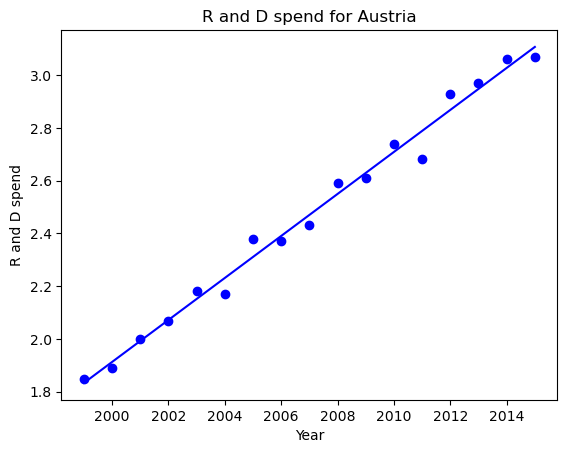

In [20]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# 读取数据
randd = pd.read_csv('r_and_d_spend.csv')
print(randd)

# 绘制奥地利的数据
fig, ax = plt.subplots()
ax.plot(randd['Year'], randd['Austria'], 'bo')

# 为奥地利数据拟合一条直线
LR_aus = st.linregress(randd['Year'], randd['Austria'])
y_aus = LR_aus.intercept + LR_aus.slope * randd['Year']

ax.plot(randd['Year'], y_aus, 'b-')

ax.set(xlabel='Year', ylabel='R and D spend', title='R and D spend for Austria')
plt.show()
